# Python in Meteorology

Xin Zhang

Oct., 2020

<center>
<img src="./imgs/stripe.png" alt="stripe">
</center>

<sub><sup> Source: https://showyourstripes.info/ </sup></sub>

<center>
<img src="./imgs/web_4.jpg" alt="1">
</center>

<center>
<img src="./imgs/web_2.jpg" alt="2">
</center>

<center>
<img src="./imgs/web_3.jpg" alt="3">
</center>

## Python is ...

* a *high-level*, *structured*, *open-source*, *interpreted* programming language

* a really good choice for almost any programming task

* a very popular and effective choice for data science tasks

# Trend

<center>
<img src="./imgs/trend.jpg" alt="trend" width="850" height="850">
</center>

<sub><sup> Source (202010): https://insights.stackoverflow.com/trends </sup></sub>

# Trend

<center>
<img src="./imgs/trend_python.jpg" alt="trend_python" width="850" height="850">
</center>

<sub><sup> Source (202010): https://insights.stackoverflow.com/trends </sup></sub>

# Trend

<center>
<img src="./imgs/shop.jpg" alt="shop" width="450">
</center>

# Why choose Python?

* It can do **anything** ...

 * **Open-source** and community support

* Strength in **numeric computations**

* useful packages for **atmospheric science**

# Sections

* Set up


* Basics


* Packages and Applications

# Set up

* [Official home of Python](https://www.python.org/)


* **Anaconda**

# Anaconda

* [Official website](https://www.anaconda.com/distribution/#download-section)

* [TUNA anaconda mirror](https://mirror.tuna.tsinghua.edu.cn/help/anaconda/)

<br />

<font style="color:#800;">
    <strong>Note</strong>:<br>
    <em>Add Anaconda to PATH environment variable.</em>
</font>

# Git

* [Official website](https://www.git-scm.com/)

# IDE (Integrated Development Environment)

* [Jupyter Notebook](https://jupyter.org/)
* [Sublime text](https://www.sublimetext.com/)
* [VS Code](https://code.visualstudio.com/)
* [PyCharm](https://www.jetbrains.com/pycharm/)
* [Spyder](https://www.spyder-ide.org/)

# Conda

```
# Check the channels
cat ~/.condarc

# Create new environment
conda create -n <name> python=<3.7>

# Activate environment
conda activate <name>

# Install package
conda install <matplotlib>
```
<sub><sup> Detailed doc: https://docs.conda.io/projects/conda/en/latest/user-guide/tasks/manage-environments.html </sup></sub>

# Conda

```
channel_priority: true

channels:
  - conda-forge
  - defaults

show_channel_urls: true

channel_alias: https://mirrors.tuna.tsinghua.edu.cn/anaconda
default_channels:
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/main
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/free
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/r
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/pro
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/pkgs/msys2
  - https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud/Paddle/
custom_channels:
  conda-forge: https://mirrors.tuna.tsinghua.edu.cn/anaconda/cloud

```

# Basics

### Books

* [Think Python 2e](https://greenteapress.com/wp/think-python-2e/)
- [Think Python 2e (zh)](https://greenteapress.com/wp/think-python-2e/)

* [廖雪峰](https://www.liaoxuefeng.com/wiki/1016959663602400)

### Videos

* [Python Tutorials](https://www.youtube.com/playlist?list=PL-osiE80TeTt2d9bfVyTiXJA-UTHn6WwU)
* [Learning to program with Python3](https://www.youtube.com/playlist?list=PLQVvvaa0QuDeAams7fkdcwOGBpGdHpXln)

# Hello World

In [1]:
print ('Hello World')

Hello World


# Data types

* Numbers

* Strings

* Booleans

* List, Tuple & Set

* **Dictionary**

# Others

* Conditional Statements

* <font style="color:red;">
    Loops &#x2718; (numba &#x2714;)
  </font>

* Functions

* **Decorator**

* **Classes and Objects**

* **Modules and Packages**

# Packages

<center>
<img src="./imgs/scipy-stack.png" alt="packages" width=950>
</center>

# Packages (fundamental)

## [numpy](https://numpy.org/)

The fundamental package for scientific computing with Python

In [2]:
import numpy as np
from numba import jit

def model_py(data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            k = data[i, j] * (i + j)

@jit
def model_numba(data):
    for i in range(data.shape[0]):
        for j in range(data.shape[1]):
            k = data[i, j] * (i + j)

rain = np.arange(100).reshape(10, 10)

In [3]:
%timeit model_py(rain)

%timeit model_numba(rain)

58.4 µs ± 2.05 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
The slowest run took 17.00 times longer than the fastest. This could mean that an intermediate result is being cached.
1.47 µs ± 2.18 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


# Packages (fundamental)

## [scipy](https://docs.scipy.org/doc/scipy/reference/)

A Python-based ecosystem of open-source software for mathematics, science, and engineering

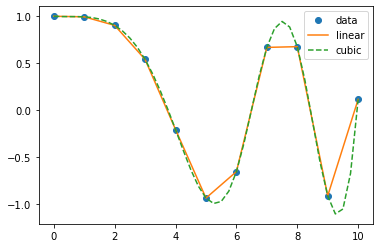

In [4]:
from scipy.interpolate import interp1d

x = np.linspace(0, 10, num=11, endpoint=True)
y = np.cos(-x**2/9.0)
f = interp1d(x, y)
f2 = interp1d(x, y, kind='cubic')

xnew = np.linspace(0, 10, num=41, endpoint=True)

import matplotlib.pyplot as plt

plt.plot(x, y, 'o', xnew, f(xnew), '-', xnew, f2(xnew), '--')
plt.legend(['data', 'linear', 'cubic'], loc='best')

# Packages (plot)

## [matplotlib](https://matplotlib.org/)

A comprehensive library for creating static, animated, and interactive visualizations

**pcolormesh** and **contourf**

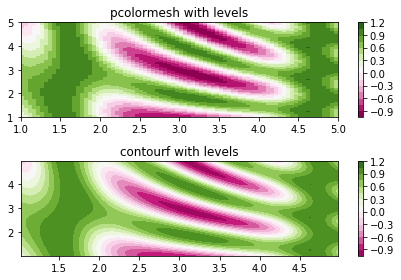

In [5]:
# Source: https://matplotlib.org/3.1.1/gallery/images_contours_and_fields/pcolormesh_levels.html

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

# create data
dx, dy = 0.05, 0.05
y, x = np.mgrid[slice(1, 5 + dy, dy),
                slice(1, 5 + dx, dx)]
z = np.sin(x)**10 + np.cos(10 + y*x) * np.cos(x)
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# set colormap
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# create figure
fig, (ax0, ax1) = plt.subplots(nrows=2)

# pcolormesh
im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

# contourf
cf = ax1.contourf(x[:-1, :-1] + dx/2.,
                  y[:-1, :-1] + dy/2., z, levels=levels,
                  cmap=cmap)
fig.colorbar(cf, ax=ax1)
ax1.set_title('contourf with levels')

fig.tight_layout()

**barb**

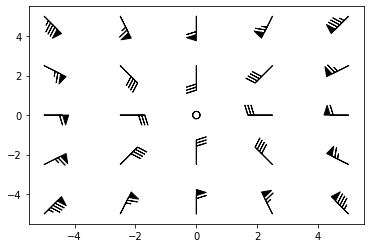

In [6]:
# Source: https://matplotlib.org/gallery/images_contours_and_fields/barb_demo.html

import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12 * X, 12 * Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

fig1, ax = plt.subplots()
ax.barbs(X, Y, U, V)

**heatmap**

Text(0.5, 1.0, 'Harvest of local farmers (in tons/year)')

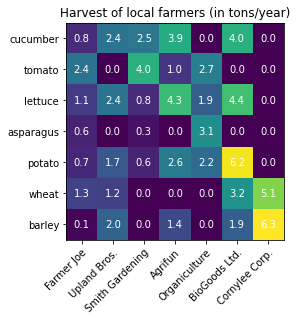

In [7]:
# Source: https://matplotlib.org/gallery/images_contours_and_fields/image_annotated_heatmap.html

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(harvest)

ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)

plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

for i in range(len(vegetables)):
    for j in range(len(farmers)):
        text = ax.text(j, i, harvest[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Harvest of local farmers (in tons/year)")

# Packages (plot)

## [seaborn](https://seaborn.pydata.org/)

A Python data visualization library based on matplotlib

<center>
<img src="./imgs/seaborn.jpg" alt="seaborn" width=900>
</center>

# Packages (plot)

## [plotly](https://plotly.com/)

The interactive graphing library for Python

In [8]:
# Source: https://plot.ly/python/line-charts/

import plotly.graph_objects as go
from plotly.offline import plot

# Create random data with numpy
import numpy as np
np.random.seed(1)

N = 100
random_x = np.linspace(0, 1, N)
random_y0 = np.random.randn(N) + 5
random_y1 = np.random.randn(N)
random_y2 = np.random.randn(N) - 5

# Create traces
fig = go.Figure()
fig.add_trace(go.Scatter(x=random_x, y=random_y0,
                    mode='lines',
                    name='lines'))
fig.add_trace(go.Scatter(x=random_x, y=random_y1,
                    mode='lines+markers',
                    name='lines+markers'))
fig.add_trace(go.Scatter(x=random_x, y=random_y2,
                    mode='markers', name='markers'))

# Packages (plot)

## [hvplot](https://hvplot.holoviz.org/)

A high-level plotting API for the PyData ecosystem built on HoloViews

<center>
<img src="https://hvplot.holoviz.org/assets/diagram.png" alt="hvplot" width=900>
</center>

# Packages (plot)

## [proplot](https://proplot.readthedocs.io/en/latest/)

A lightweight matplotlib wrapper for making beautiful, publication-quality graphics

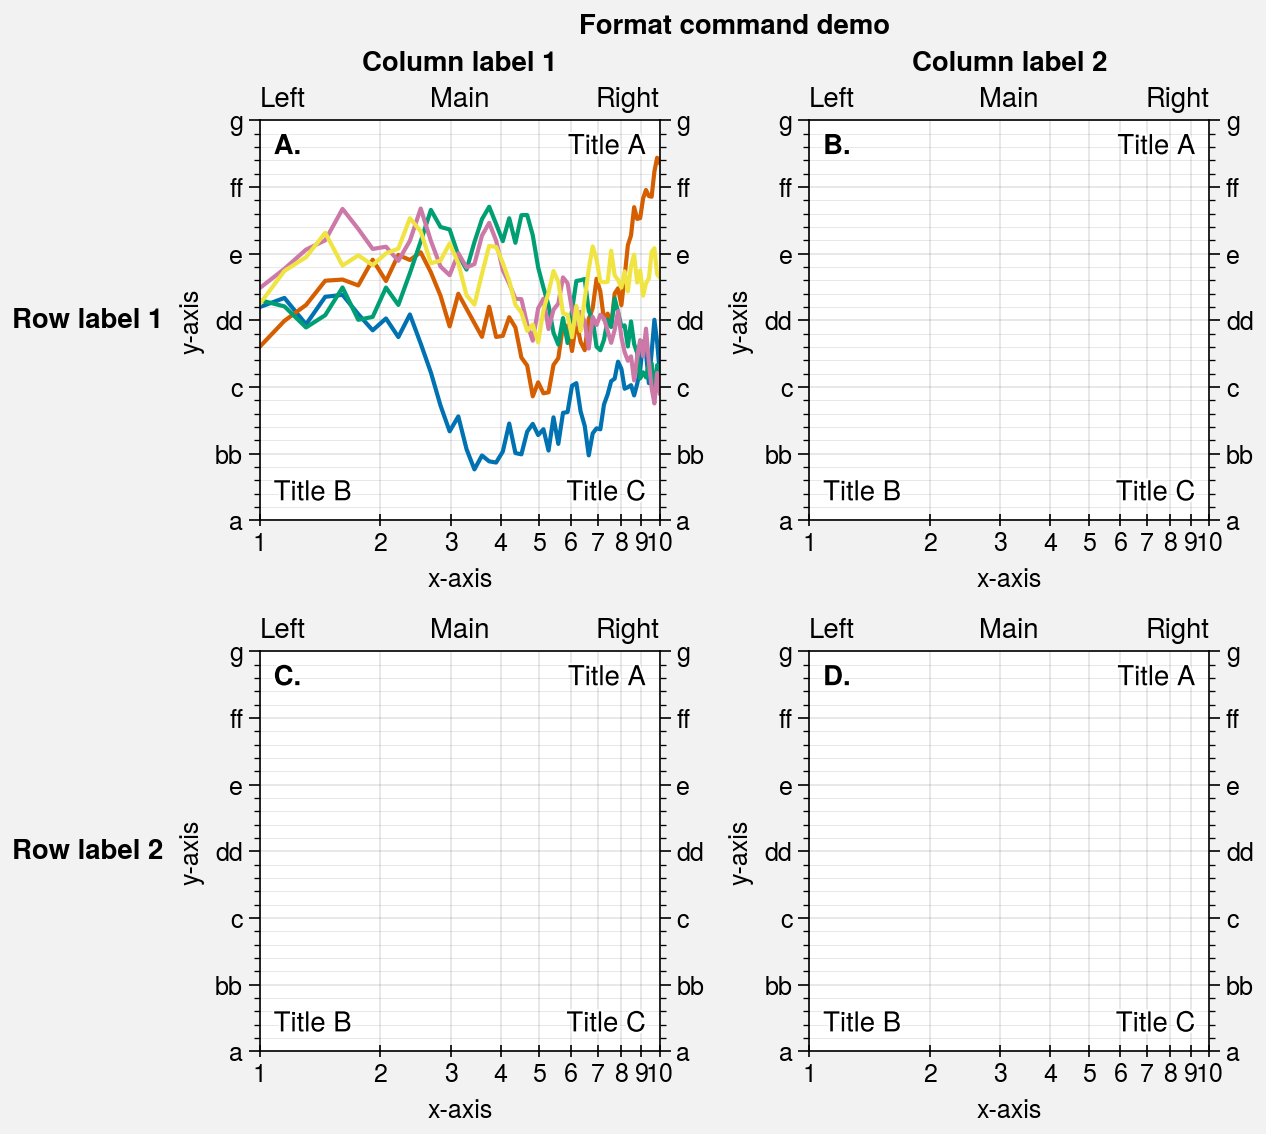

In [9]:
import proplot as plot
import numpy as np

fig, axs = plot.subplots(ncols=2, nrows=2, share=0, tight=True, axwidth=2)
state = np.random.RandomState(51423)
N = 60
x = np.linspace(1, 10, N)
y = (state.rand(N, 5) - 0.5).cumsum(axis=0)
axs[0].plot(x, y, linewidth=1.5)

axs.format(
    suptitle='Format command demo',
    abc=True, abcloc='ul', abcstyle='A.',
    title='Main', ltitle='Left', rtitle='Right',  # different titles
    urtitle='Title A', lltitle='Title B', lrtitle='Title C',  # extra titles
    collabels=['Column label 1', 'Column label 2'],
    rowlabels=['Row label 1', 'Row label 2'],
    xlabel='x-axis', ylabel='y-axis',
    xscale='log',
    xlim=(1, 10), xticks=1,
    ylim=(-3, 3), yticks=plot.arange(-3, 3),
    yticklabels=('a', 'bb', 'c', 'dd', 'e', 'ff', 'g'),
    ytickloc='both', yticklabelloc='both',
    xtickdir='inout', xtickminor=False, ygridminor=True,
)

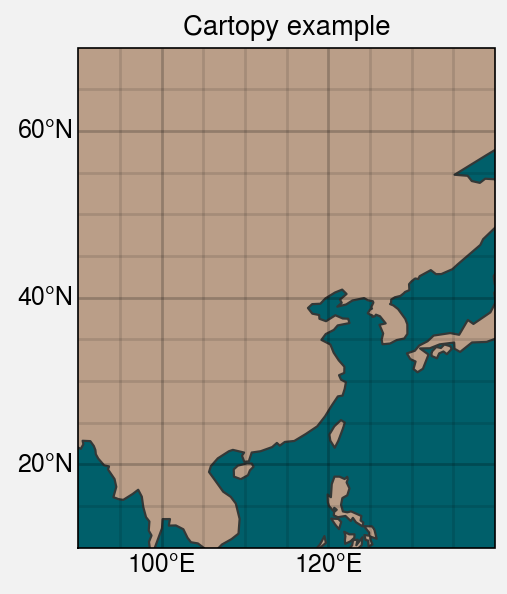

In [10]:
# cartopy: https://scitools.org.uk/cartopy/docs/latest/

import proplot as plot

fig, axs = plot.subplots(proj='cyl')
axs.format(labels=True, lonlines=20, latlines=20, gridminor=True,
           lonlim=(90, 140), latlim=(10, 70), title='Cartopy example',
           land=True, coast=True,
           landcolor='mushroom', facecolor='petrol', coastcolor='charcoal',
           coastlinewidth=0.8, gridlinewidth=1)

<center>
<img src="./imgs/plot_types.jpg" alt="plot_type",  width=1000>
</center>

<sub><sup> Source: https://www.cdslab.org/python/notes/visualization/overview/pyviz.pdf </sup></sub>

# Packages (data)

## [pandas](https://pandas.pydata.org/)


| Format Type | Data Description                                             | Reader                                                       | Writer                                                       |
| :---------- | :----------------------------------------------------------- | :----------------------------------------------------------- | :----------------------------------------------------------- |
| text        | [CSV](https://en.wikipedia.org/wiki/Comma-separated_values)  | [read_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-csv-table) | [to_csv](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-store-in-csv) |
| text        | [JSON](https://www.json.org/)                                | [read_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-reader) | [to_json](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-json-writer) |
| text        | [HTML](https://en.wikipedia.org/wiki/HTML)                   | [read_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-read-html) | [to_html](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-html) |
| text        | Local clipboard                                              | [read_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard) | [to_clipboard](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-clipboard) |
| binary      | [MS Excel](https://en.wikipedia.org/wiki/Microsoft_Excel)    | [read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-reader) | [to_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-excel-writer) |
| binary      | [OpenDocument](http://www.opendocumentformat.org/)           | [read_excel](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-ods) |                                                              |
| binary      | [HDF5 Format](https://support.hdfgroup.org/HDF5/whatishdf5.html) | [read_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5) | [to_hdf](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-hdf5) |
| binary      | [Feather Format](https://github.com/wesm/feather)            | [read_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather) | [to_feather](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-feather) |
| binary      | [Parquet Format](https://parquet.apache.org/)                | [read_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet) | [to_parquet](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-parquet) |
| binary      | [Msgpack](https://msgpack.org/index.html)                    | [read_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack) | [to_msgpack](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-msgpack) |
| binary      | [Stata](https://en.wikipedia.org/wiki/Stata)                 | [read_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-reader) | [to_stata](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-stata-writer) |
| binary      | [SAS](https://en.wikipedia.org/wiki/SAS_(software))          | [read_sas](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sas-reader) |                                                              |
| binary      | [Python Pickle Format](https://docs.python.org/3/library/pickle.html) | [read_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle) | [to_pickle](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-pickle) |
| SQL         | [SQL](https://en.wikipedia.org/wiki/SQL)                     | [read_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql) | [to_sql](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-sql) |
| SQL         | [Google Big Query](https://en.wikipedia.org/wiki/BigQuery)   | [read_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery) | [to_gbq](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html#io-bigquery) |

In [11]:
import pandas as pd

rng = pd.date_range('1/1/2012', periods=1000, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

display(ts)

2012-01-01 00:00:00    391
2012-01-01 00:00:01    380
2012-01-01 00:00:02    467
2012-01-01 00:00:03    184
2012-01-01 00:00:04     51
                      ... 
2012-01-01 00:16:35      9
2012-01-01 00:16:36    490
2012-01-01 00:16:37    323
2012-01-01 00:16:38     81
2012-01-01 00:16:39     79
Freq: S, Length: 1000, dtype: int32

<AxesSubplot:>

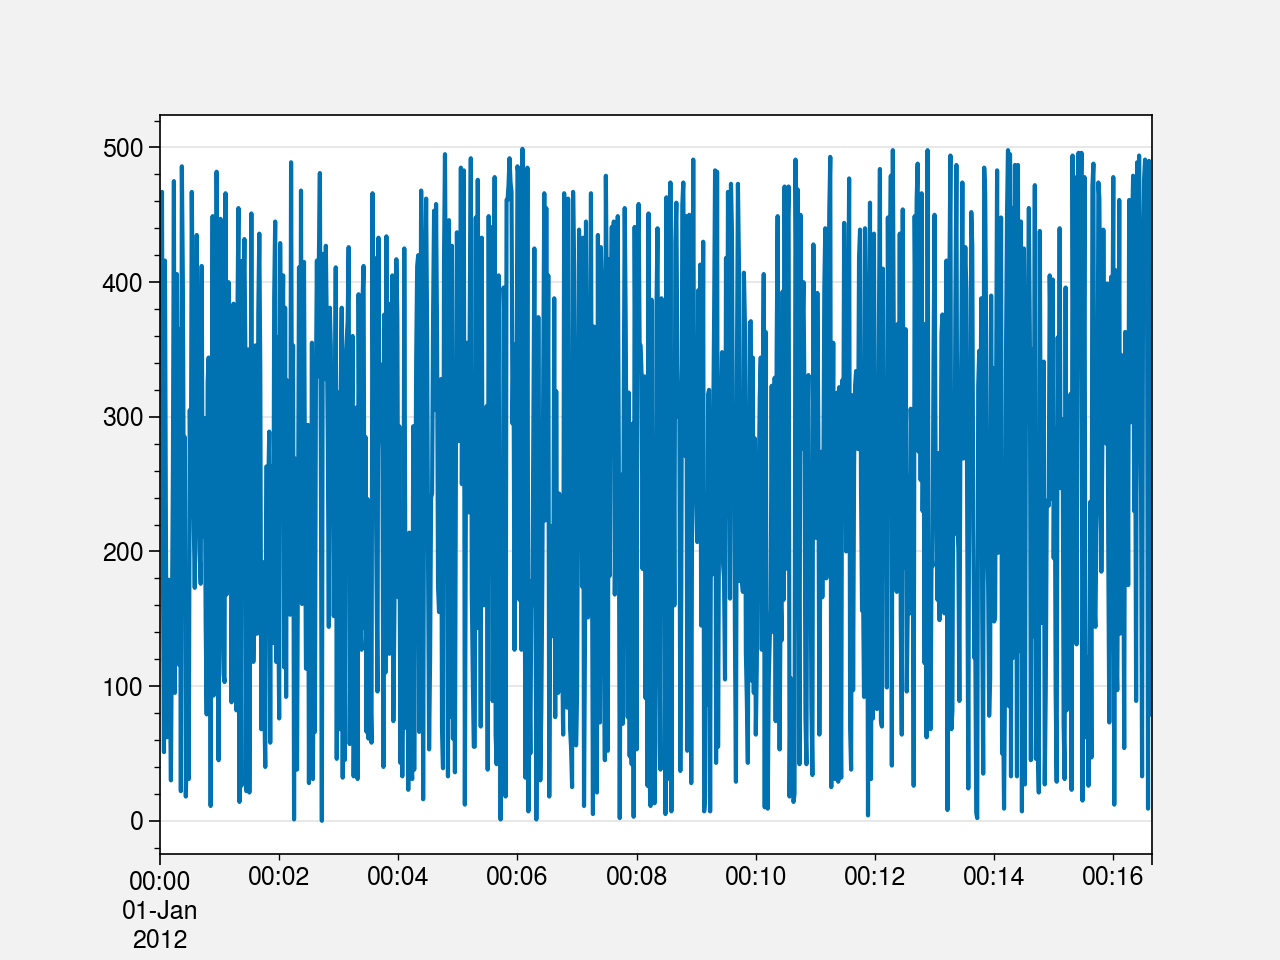

In [12]:
ts.plot()

A         B         C         D
2012-01-01 00:00:00 -1.114301  0.714626  0.487724 -2.817440
2012-01-01 00:00:01  1.079213  0.517738 -0.692986 -0.294533
2012-01-01 00:00:02  1.063558  0.474481 -1.196752 -0.610907
2012-01-01 00:00:03 -1.528466 -0.135475  1.358972 -0.754189
2012-01-01 00:00:04 -0.770532 -0.070560  1.068228 -1.599954
...                       ...       ...       ...       ...
2012-01-01 00:16:35  0.611453 -1.044737  0.714948 -0.561284
2012-01-01 00:16:36  1.809868  0.568837 -0.827369  0.351090
2012-01-01 00:16:37  1.995885  0.295485  0.825723 -0.983706
2012-01-01 00:16:38 -0.472260  0.449837  0.898420  0.551670
2012-01-01 00:16:39  0.165936  0.541421  0.143726 -0.409189

[1000 rows x 4 columns]

<AxesSubplot:>

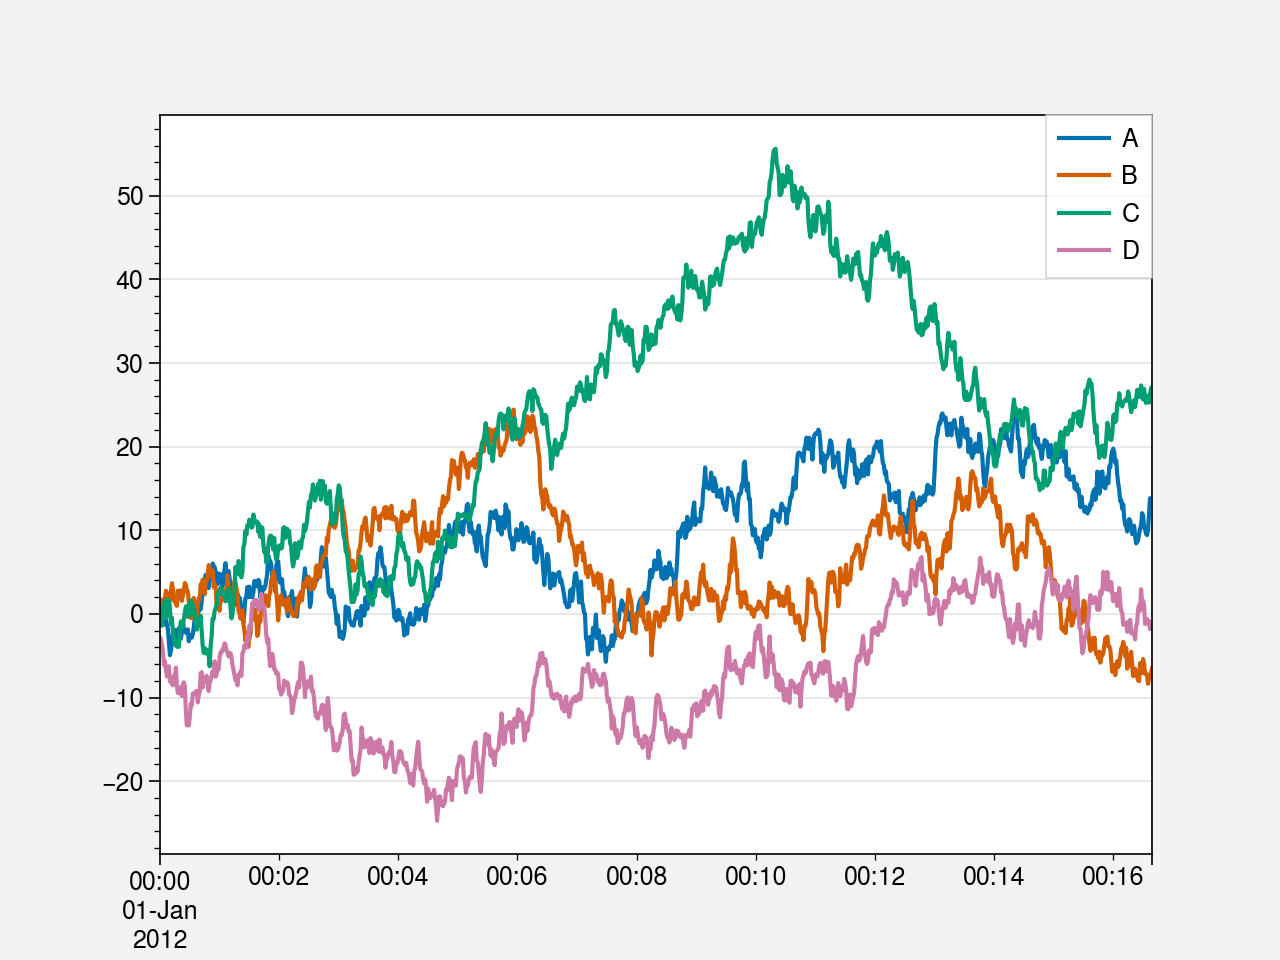

In [13]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
display(df)
df.cumsum().plot()

# Packages (data)

## [xarray](http://xarray.pydata.org/en/stable/index.html)

- Pickle
- **NetCDF 3/4**
- RasterIO
- Zarr
- PyNio

<center>
<img src="https://github.com/pydata/xarray/raw/master/doc/_static/dataset-diagram.png" alt="xarray" width=900>
</center>

# Packages (data)

## [wrf-python](https://wrf-python.readthedocs.io/en/latest/)

A collection of diagnostic and interpolation routines for use with output from the Weather Research and Forecasting (WRF-ARW) Model.

<center>
<img src="https://wrf-python.readthedocs.io/en/latest/_images/matthew.png" width="850" height="850">
</center>

# Packages (data)

## [xESMF](https://xesmf.readthedocs.io/en/latest/), [pyresample](https://pyresample.readthedocs.io/en/latest/)

resampling data

<center>
<img src="https://xesmf.readthedocs.io/en/latest/_images/notebooks_Curvilinear_grid_8_0.png" width="850" height="850">
</center>

<center>
<img src="https://xesmf.readthedocs.io/en/latest/_images/notebooks_Curvilinear_grid_25_0.png" width="850" height="850">
</center>

# Packages (data)

## [MetPy](https://unidata.github.io/MetPy/latest/index.html)

reading, visualizing, and performing calculations with weather data.

<center>
<img src="https://unidata.github.io/python-gallery/_images/sphx_glr_Sounding_Plotter_001.png" width="850" height="850">
</center>

# Packages (data)

## [Satpy](https://satpy.readthedocs.io/en/latest/)

reading, manipulating, and writing data from remote-sensing earth-observing meteorological satellite instruments.

<center>
<img src="https://github.com/zxdawn/pytroll-examples/blob/add_fy4a/satpy/figures/agri_true_color.png?raw=true" width="450" height="450">
</center>

<center>
<img src="https://github.com/zxdawn/pytroll-examples/blob/add_fy4a/satpy/figures/agri_C12_resampled_colorize.png?raw=true" width="450" height="450">
</center>

# Packages (data)

## [pywr](https://github.com/YvZheng/pycwr), [PyART](https://arm-doe.github.io/pyart/)

working with data from a number of precipitation radars

<center>
<img src="https://github.com/YvZheng/pycwr/raw/master/pictures/pycwr.png">
</center>

# Summary

## Basic

- numpy
- scipy

# Summary

## Plot

- Basic Plot
    - matplotlib

- Scientific Plot
    - proplot

- Beautiful Plot
    - seaborn

- Interractive Plot
    - plotly
    - hvplot

# Summary

## Atmospheric data

- Ground data
    - pandas
    - matpy

- Radar data
    - pycwr

- Satellite data
    - satpy
    - xarray
    - h5py

- Model data
    - wrf-python
    - xarray

### About Me

### Contact

* Website:
  - [dreambooker.site](https://dreambooker.site/)
  - [hpc-nuist-ap.github.io](https://hpc-nuist-ap.github.io/)
* GitHub: [@zxdawn](https://github.com/zxdawn)    
* Twitter: [@zhangxin_dawn](https://twitter.com/zhangxin_dawn)
* Email: [xinzhang1215@gmail.com](mailto:xinzhang1215@gmail.com)

### My repositories

- [Marked-Tutorials](https://github.com/zxdawn/Marked-Tutorials): Useful tutorials including Python
- [Marked-Softwares](https://github.com/zxdawn/Marked-Softwares): Some useful and free softwares used in my study
- [pyXZ](https://github.com/zxdawn/pyXZ): Python scripts in my meteorological research life
- [weather_data](https://github.com/zxdawn/weather_data): Scripts of downloading weather data: satellite and reanalysis data
- [hpc-nuist-ap.github.io](https://github.com/hpc-nuist-ap/hpc-nuist-ap.github.io): Official website of school's HPC

## We’re stationary and ~~time~~ Python passes through us.

<br>

<div style="text-align: right"> Quote from "I'm thinking of ending things" </div>